In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [4]:
pd.set_option('Display.Max_Column',None)

In [5]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
cat_vars=[]
num_vars=[]

for col in data.columns:
    if data[col].dtype in ('float64','int64'):
        if col == 'symboling':
            cat_vars.append(col)
        else:
            num_vars.append(col)
    else:
        cat_vars.append(col)

In [12]:
cat_vars

['symboling',
 'CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [13]:
data = pd.get_dummies(data,columns=cat_vars,prefix=cat_vars)
data.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-2,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,CarName_dodge challenger se,CarName_dodge colt (sw),CarName_dodge colt hardtop,CarName_dodge coronet custom,CarName_dodge coronet custom (sw),CarName_dodge d200,CarName_dodge dart custom,CarName_dodge monaco (sw),CarName_dodge rampage,CarName_honda accord,CarName_honda accord cvcc,CarName_honda accord lx,CarName_honda civic,CarName_honda civic (auto),CarName_honda civic 1300,CarName_honda civic 1500 gl,CarName_honda civic cvcc,CarName_honda prelude,CarName_isuzu D-Max,CarName_isuzu D-Max V-Cross,CarName_isuzu MU-X,CarName_jaguar xf,CarName_jaguar xj,CarName_jaguar xk,CarName_maxda glc deluxe,CarName_maxda rx3,CarName_mazda 626,CarName_mazda glc,CarName_mazda glc 4,CarName_mazda glc custom,CarName_mazda glc custom l,CarName_mazda glc deluxe,CarName_mazda rx-4,CarName_mazda rx-7 gs,CarName_mazda rx2 coupe,CarName_mercury cougar,CarName_mitsubishi g4,CarName_mitsubishi lancer,CarName_mitsubishi mirage,CarName_mitsubishi mirage g4,CarName_mitsubishi montero,CarName_mitsubishi outlander,CarName_mitsubishi pajero,CarName_nissan clipper,CarName_nissan dayz,CarName_nissan fuga,CarName_nissan gt-r,CarName_nissan juke,CarName_nissan kicks,CarName_nissan latio,CarName_nissan leaf,CarName_nissan note,CarName_nissan nv200,CarName_nissan otti,CarName_nissan rogue,CarName_nissan teana,CarName_nissan titan,CarName_peugeot 304,CarName_peugeot 504,CarName_peugeot 504 (sw),CarName_peugeot 505s turbo diesel,CarName_peugeot 604sl,CarName_plymouth cricket,CarName_plymouth duster,CarName_plymouth fury gran sedan,CarName_plymouth fury iii,CarName_plymouth satellite custom (sw),CarName_plymouth valiant,CarName_porcshce panamera,CarName_porsche boxter,CarName_porsche cayenne,CarName_porsche macan,CarName_renault 12tl,CarName_renault 5 gtl,CarName_saab 99e,CarName_saab 99gle,CarName_saab 99le,CarName_subaru,CarName_subaru baja,CarName_subaru brz,CarName_subaru dl,CarName_subaru r1,CarName_subaru r2,CarName_subaru trezia,CarName_subaru tribeca,CarName_toyota carina,CarName_toyota celica gt,CarName_toyota celica gt liftback,CarName_toyota corolla,CarName_toyota corolla 1200,CarName_toyota corolla 1600 (sw),CarName_toyota corolla liftback,CarName_toyota corolla tercel,CarName_toyota corona,CarName_toyota corona hardtop,CarName_toyota corona liftback,CarName_toyota corona mark ii,CarName_toyota cressida,CarName_toyota mark ii,CarName_toyota starlet,CarName_toyota tercel,CarName_toyouta tercel,CarName_vokswagen rabbit,CarName_volkswagen 1131 deluxe sedan,CarName_volkswagen 411 (sw),CarName_volkswagen dasher,CarName_volkswagen model 111,CarName_volkswagen rabbit,CarName_volkswagen rabbit custom,CarName_volkswagen super beetle,CarName_volkswagen type 3,CarName_volvo 144ea,CarName_volvo 145e (sw),CarName_volvo 244dl,CarName_volvo 245,CarName_volvo 246,CarName_volvo 264gl,CarName_volvo diesel,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,engi

In [14]:
data.drop(columns='car_ID',inplace=True)

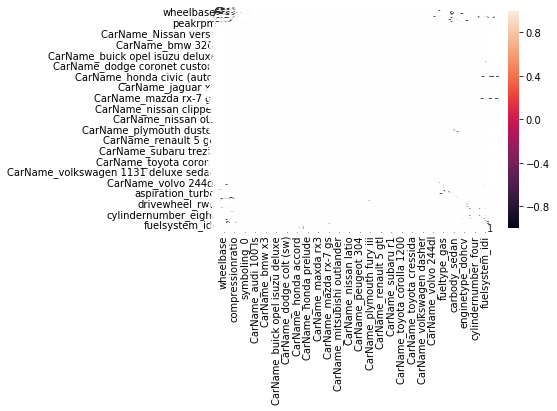

In [16]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x = data.drop(columns='price')
y = data.price

In [19]:
xcols=list(x.columns)

In [21]:
scaler = StandardScaler()
x_new = pd.DataFrame(scaler.fit_transform(x),columns=xcols,index=np.arange(0,x.shape[0]))

In [22]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new,y,train_size=0.7,random_state=3)

In [23]:
lr = LinearRegression()
lr = lr.fit(xtrain,ytrain)
print('train score =', lr.score(xtrain,ytrain))

train score = 0.9998503715439356


In [24]:
ypred_lr = lr.predict(xtest)

In [26]:
from sklearn.metrics import r2_score

In [27]:
print('Prediction score =',r2_score(ytest,ypred_lr))

Prediction score = -2.279282582717184e+24


In [36]:
# Build Lasso Regression
alph = []
score = []
for Lalpha in range(1,1002,10):
    alph.append(Lalpha)
    las = Lasso(alpha=Lalpha).fit(xtrain,ytrain)
    ypred_las = las.predict(xtest)
    score.append(r2_score(ytest,ypred_las))

Lasso_Metrics = pd.DataFrame({'Alpha':alph, 'Pred_score':score})
Lasso_Metrics

C:\Users\Anupama\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2166395.299173831, tolerance: 823276.1858162847
  positive)


,Alpha,Pred_score
0,1,0.761612
1,11,0.783939
2,21,0.796463
3,31,0.794740
4,41,0.796341
5,51,0.797741
6,61,0.798200
7,71,0.798034
8,81,0.798513
9,91,0.798995


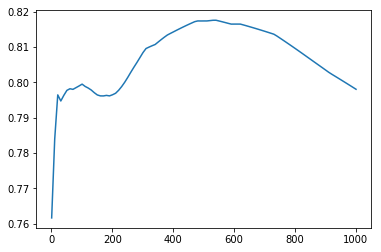

In [37]:
plt.plot(Lasso_Metrics.Alpha,Lasso_Metrics.Pred_score)
plt.show()

Alpha = 500 around

In [39]:
lasso_final = Lasso(alpha=500).fit(xtrain,ytrain)
ypred = lasso_final.predict(xtest)

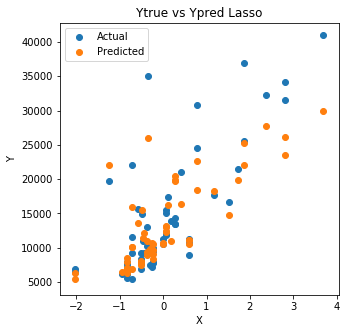

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(xtest.iloc[:,0],ytest)
plt.scatter(xtest.iloc[:,0],ypred)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Actual','Predicted'])
plt.title('Ytrue vs Ypred Lasso')
plt.show()

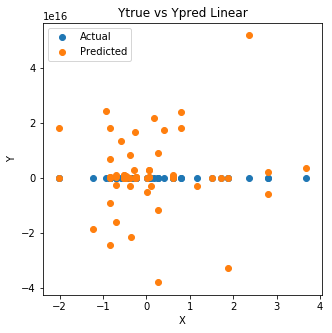

In [64]:
plt.figure(figsize=(5,5))
plt.scatter(xtest.iloc[:,0],ytest)
plt.scatter(xtest.iloc[:,0],ypred_lr)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['Actual','Predicted'])
plt.title('Ytrue vs Ypred Linear')
plt.show()